# データ概要

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2
# !pip install scikit-learn==1.2.2

In [1]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.12.2
1.2.2


In [3]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.columns =['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# データ形状
df.shape

(32561, 15)

In [5]:
# 欠損値の有無
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
# データ型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# 数値の統計情報
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# 数値変数EDA

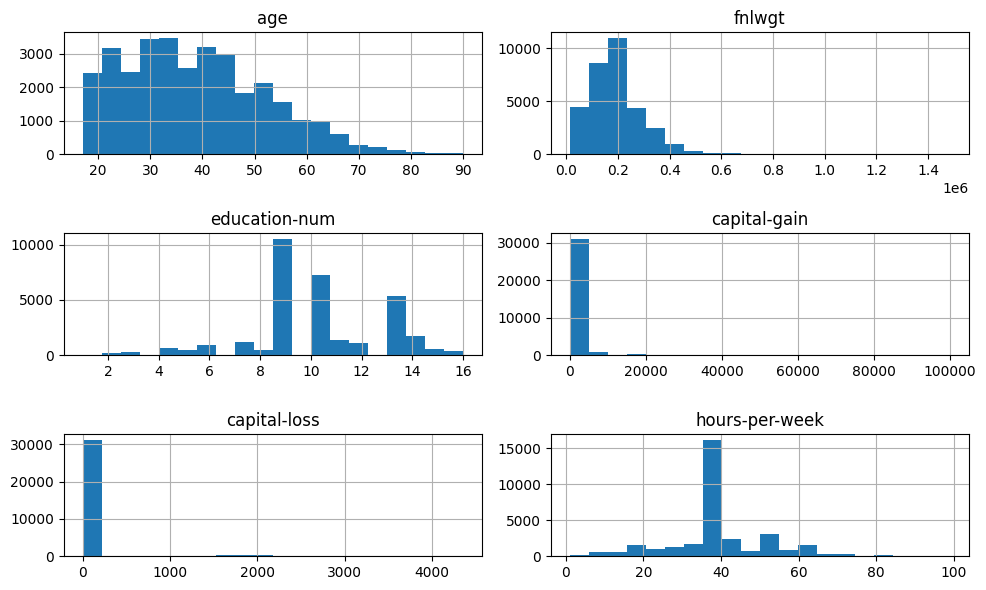

In [8]:
# 数値のヒストグラム
plt.rcParams['figure.figsize'] = (10, 6)
df.hist(bins=20)
plt.tight_layout() 
plt.show()

# カテゴリ変数EDA

In [9]:
# カテゴリ変数の統計情報
df.describe(exclude='number').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
gender,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [10]:
# カテゴリ変数のリスト表示
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for col in cat_cols:
    print('%s: %s' % (col, list(df[col].unique())))

workclass: [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']
education: [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
marital-status: [' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed']
occupation: [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']
relationship: [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried', ' Other-relative']
race: [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']
gender: [' Male', ' Female']
native-

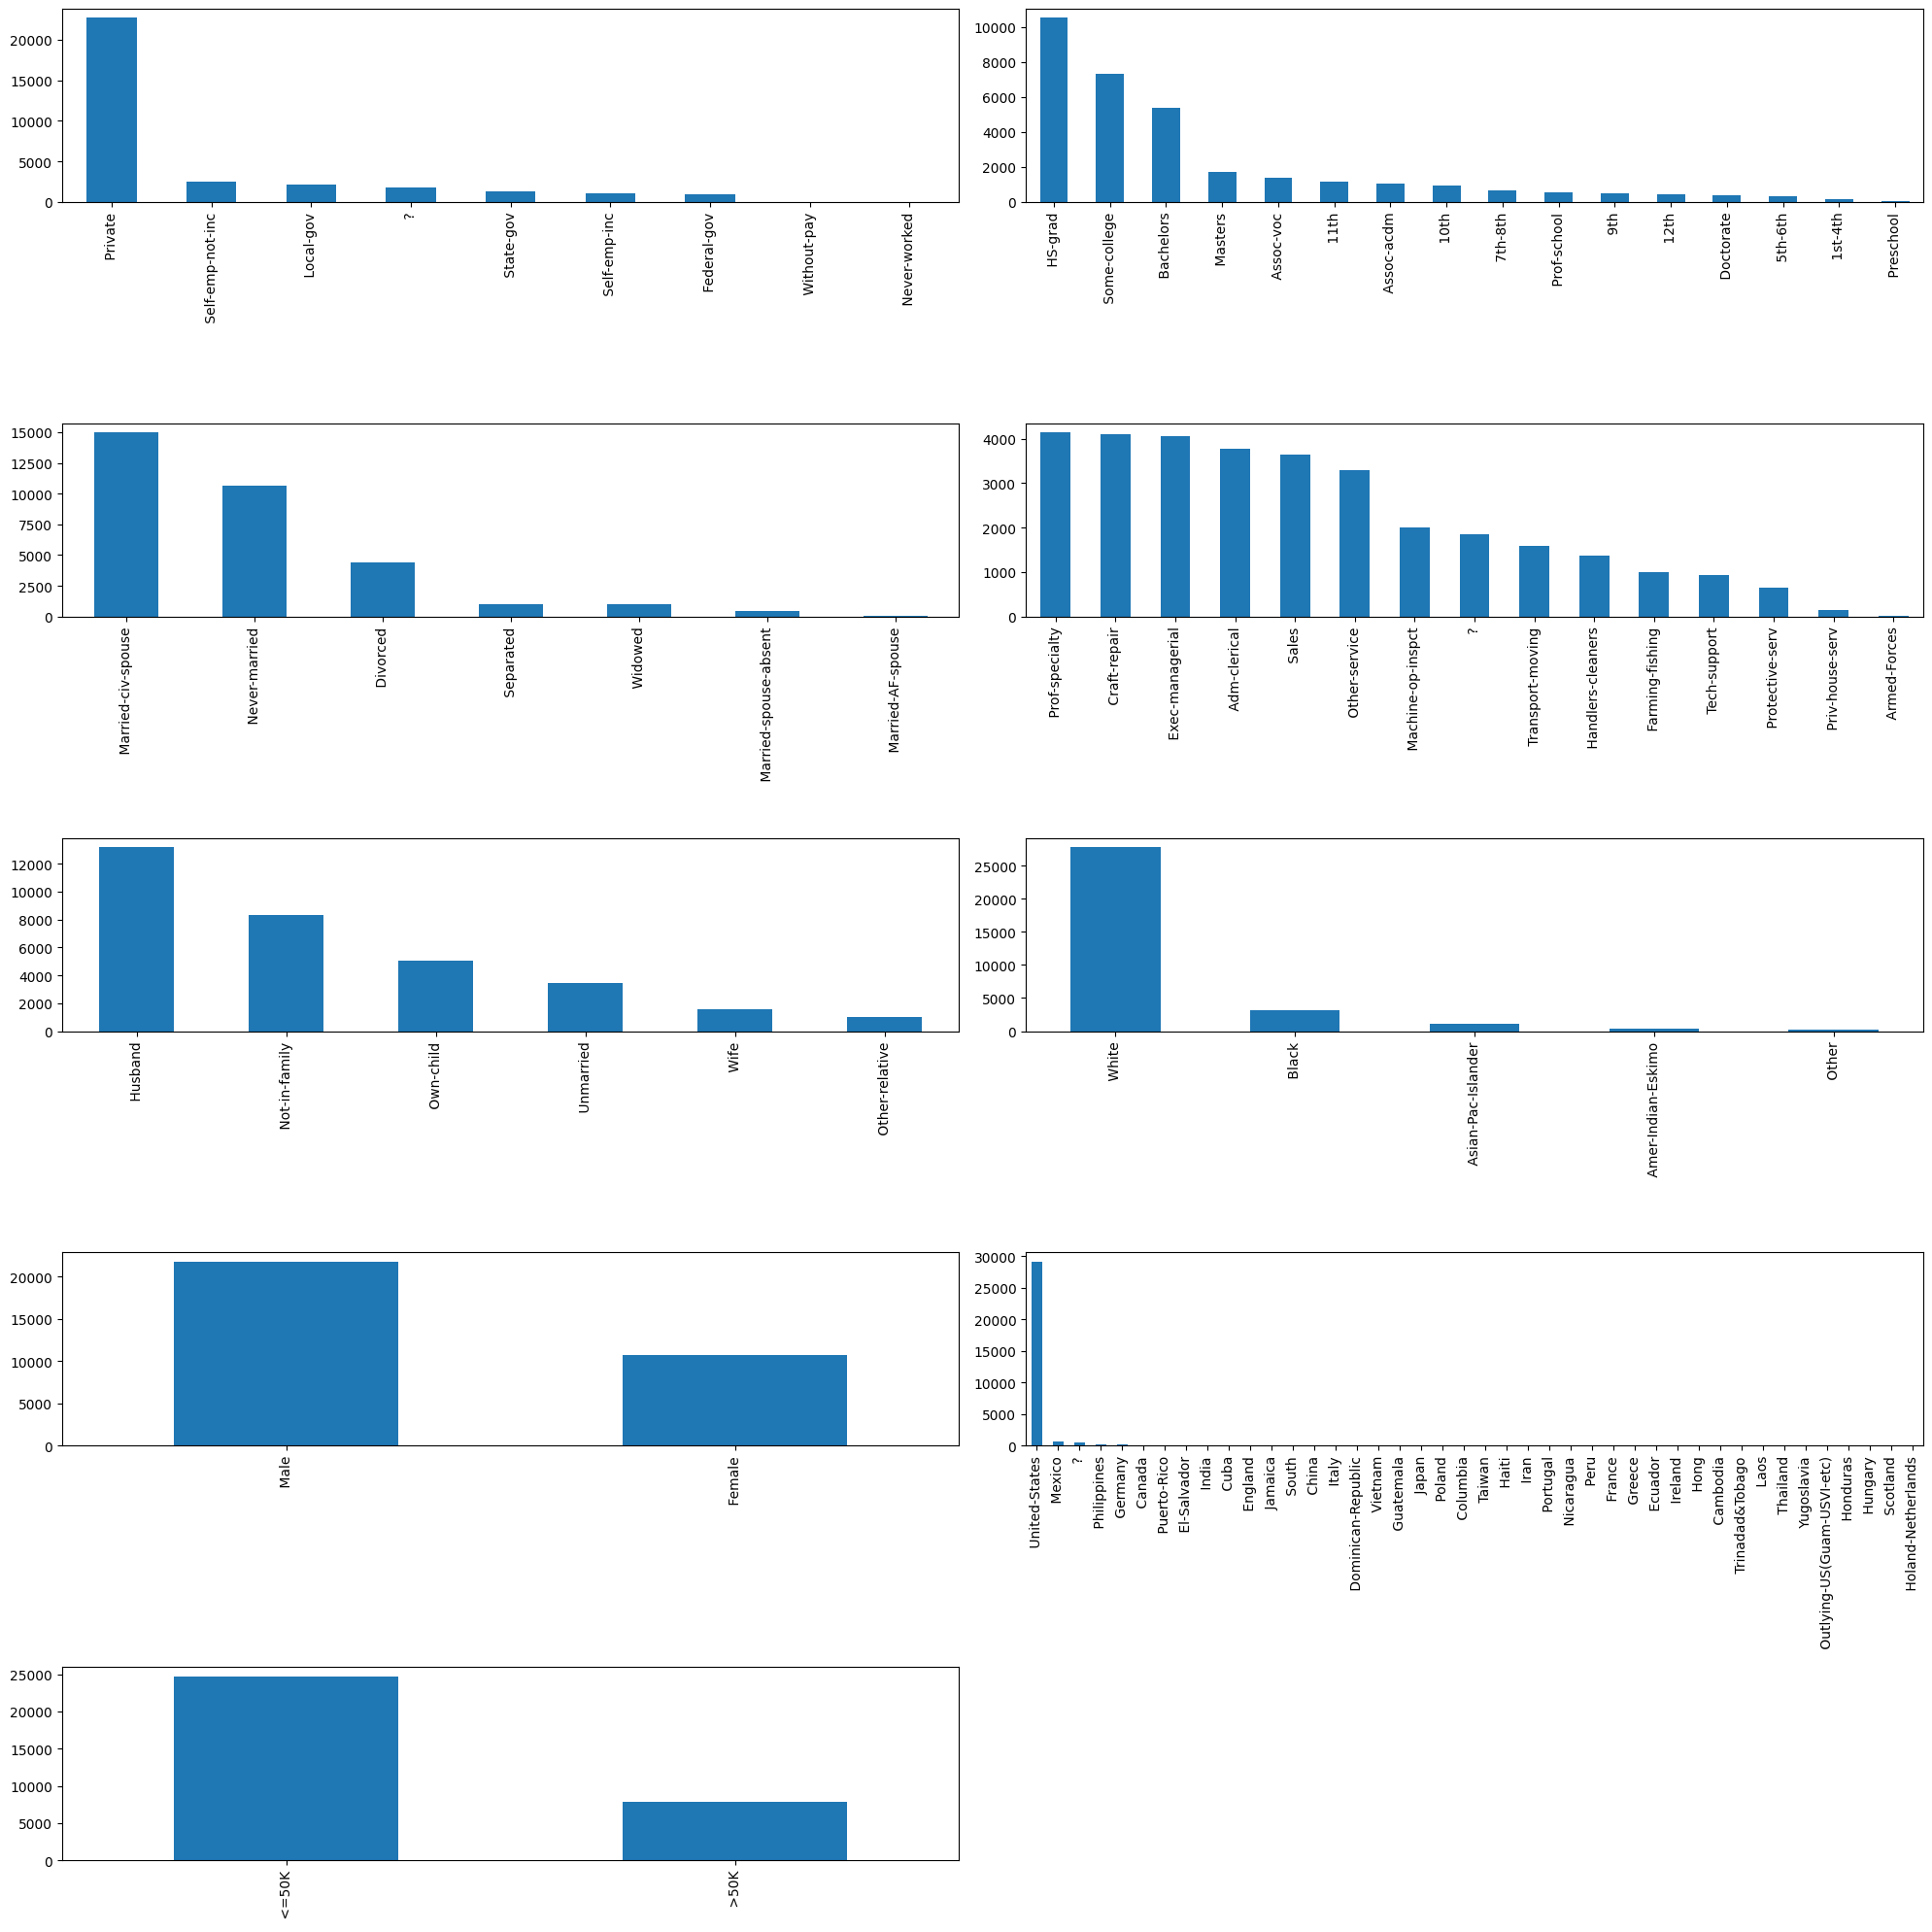

In [11]:
# カテゴリ変数の棒グラフ
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

plt.rcParams['figure.figsize'] = (20, 20)

for i, name in enumerate(cat_cols):
  ax = plt.subplot(5, 2, i+1)
  df[name].value_counts().plot(kind='bar', ax=ax)

plt.tight_layout() 
plt.show()

# 前処理

In [12]:
# 半角スペースの削除
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for s in cat_cols:
  df[s] =df[s].str.replace(' ', '')

In [13]:
# カテゴリ変数のリスト表示
for col in cat_cols:
    print('%s: %s' % (col, list(df[col].unique())))

workclass: ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked']
education: ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
marital-status: ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation: ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship: ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race: ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
gender: ['Male', 'Female']
native-country: ['United-States', 'Cuba', 'Jamaica', 'India', '?', 

In [14]:
# レコードの絞り込み
df = df[df['native-country'].isin(['United-States'])]
df = df.drop(['native-country'], axis=1)
df.reset_index(inplace=True, drop=True)
df.shape

(29170, 14)

In [15]:
# 前処理後のincome件数内訳
df['income'].value_counts()

<=50K    21999
>50K      7171
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

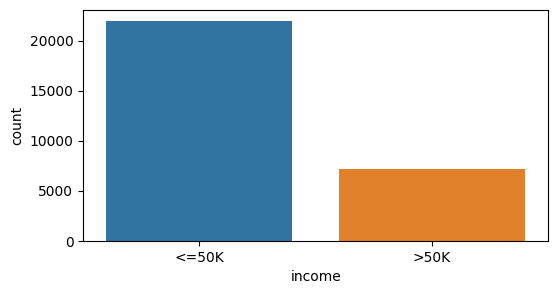

In [16]:
# 前処理後のincome件数可視化
plt.figure(figsize=(6, 3))
sns.countplot(x='income', data=df)

In [17]:
# 正解ラベルの作成
df['income'] = df['income'].replace('<=50K', 0)
df['income'] = df['income'].replace('>50K', 1)
# df.head()

In [18]:
# 前処理後のデータ
print(df.shape)
df.head()

(29170, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0


# 混同行列と正解率の検証

In [19]:
# 特徴量と目的変数の設定
X = df.drop(['income'], axis=1)
y = df['income']

In [20]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (23336, 13)  y_trainの形状： (23336,)  X_testの形状： (5834, 13)  y_testの形状： (5834,)


In [21]:
# 学習データとテストデータのラベル件数内訳
print(y_train.value_counts())
print(y_test.value_counts())

0    17599
1     5737
Name: income, dtype: int64
0    4400
1    1434
Name: income, dtype: int64


In [22]:
# 正解ラベル
y_test.values # numpy化

array([0, 1, 1, ..., 1, 0, 0])

In [23]:
# 予測ラベル0の作成
y_test_zeros = np.zeros(5834) # テストデータレコード数の0を作成
y_test_zeros

array([0., 0., 0., ..., 0., 0., 0.])

Text(45.722222222222214, 0.5, 'label')

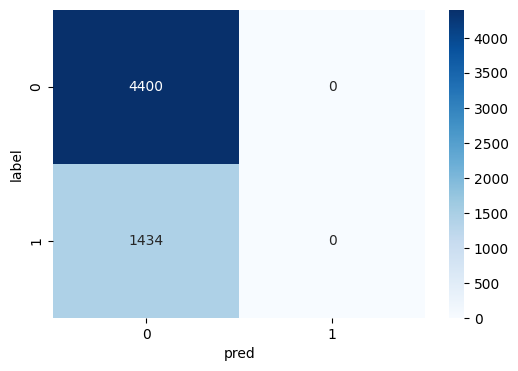

In [24]:
# 予測ラベル0の混同行列
cm = confusion_matrix(y_test, y_test_zeros)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

In [25]:
# 予測ラベル0の評価指標
ac_score = accuracy_score(y_test, y_test_zeros)
pr_score = precision_score(y_test, y_test_zeros)
rc_score = recall_score(y_test, y_test_zeros)
f1 = f1_score(y_test, y_test_zeros)

print('accuracy = %.2f' % (ac_score))
print('precision = %.2f' % (pr_score))
print('recall = %.2f' % (rc_score))
print('F1-score = %.2f' % (f1))

accuracy = 0.75
precision = 0.00
recall = 0.00
F1-score = 0.00


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# 予測ラベル1の作成
y_test_ones = np.ones(5834) # テストデータレコード数の1を作成
y_test_ones

array([1., 1., 1., ..., 1., 1., 1.])

Text(45.722222222222214, 0.5, 'label')

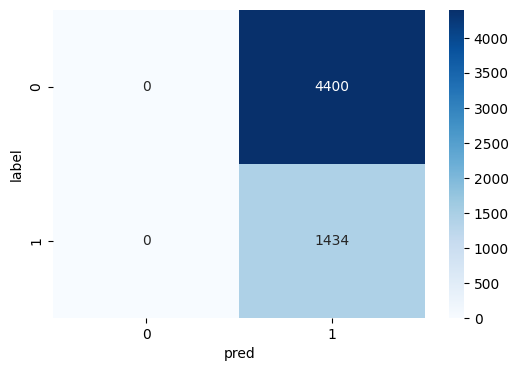

In [27]:
# 予測ラベル1の混同行列
cm = confusion_matrix(y_test, y_test_ones)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pred')
plt.ylabel('label')

In [28]:
# 予測ラベル1の評価指標
ac_score = accuracy_score(y_test, y_test_ones)
pr_score = precision_score(y_test, y_test_ones)
rc_score = recall_score(y_test, y_test_ones)
f1 = f1_score(y_test, y_test_ones)

print('accuracy = %.2f' % (ac_score))
print('precision = %.2f' % (pr_score))
print('recall = %.2f' % (rc_score))
print('F1-score = %.2f' % (f1))

accuracy = 0.25
precision = 0.25
recall = 1.00
F1-score = 0.39
